<a href="https://colab.research.google.com/github/tibebu-sime/sales-predictions/blob/main/salespredictions_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


In [ ]:
filename = '/content/drive/MyDrive/CodingDojo/Week2_PandasforDataManipulation/Exercises_and_Homework/sales_predictions.csv'
sales_data = pd.read_csv(filename)
sales_data.head(20)

In [36]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [37]:
#Method 2: Check and detect the presence of missing values using the isnull() function
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Based on the concise summary of the dataset, there are missing values within two columns, namely Item_Weight and Outlet_Size. I will be filling the missing values within the Item_Weight column by the mean of this same column but imputing the missing values within the Outlet_Size column using the Most Freuquent Imputation technique which works well with both strings or categorical features and numerical representations.  

References: 
1. https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/
2. https://jamesrledoux.com/code/imputation
3. https://stackoverflow.com/questions/32617811/imputation-of-missing-values-for-categories-in-pandas

In [38]:
# Fill the null values within the Item_Weight column with the mean of this column
sales_data['Item_Weight'] = sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean())
sales_data.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [39]:
# Check and detect the presence of missing values using the isnull() function again
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [28]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # the data is converted into NumPy array
sales_data = pd.DataFrame(imputer.fit_transform(sales_data), index=sales_data.index, columns=sales_data.columns)
sales_data


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.0160473,Dairy,249.809,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.0192782,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.423
2,FDN15,17.5,Low Fat,0.0167601,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.2,Regular,0,Fruits and Vegetables,182.095,OUT010,1998,Medium,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.0567834,Snack Foods,214.522,OUT013,1987,High,Tier 3,Supermarket Type1,2778.38
8519,FDS36,8.38,Regular,0.0469824,Baking Goods,108.157,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.285
8520,NCJ29,10.6,Low Fat,0.0351863,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.11
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.133,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.6


In [35]:
# Check and detect the presence of missing values using the isnull() function again
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# Displaying the descriptive statistics of the dataframe 
sales_data.describe()

In [ ]:
# Checking the unique appearances of each column in the dataset and replace the 
# inconsistencies 
sales_data.apply(lambda x: x.unique())

In [ ]:
# There are data entry inconsistencies in the Item_Fat_Content, so I need to
# replace them. 
sales_data['Item_Fat_Content'].unique()

In [32]:
sales_data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)

#Data Visualization 

In [36]:
# Changing the data types of the columns whose data types have been modified when
# the missing values in the Outlet_Size column were imputed. 
# Reference: https://stackoverflow.com/questions/15891038/change-column-type-in-pandas

sales_data = sales_data.astype({'Item_Weight': float, 
                                'Item_Visibility': float,
                                'Item_MRP': float,
                                'Outlet_Establishment_Year': int,
                                'Item_Outlet_Sales': float
                                               })

In [37]:
# Checking the data types 
sales_data.dtypes 

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [38]:
# the average item sales by the location types of the store 
sales_data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

In [39]:
# the average item sales by the types of store 
sales_data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

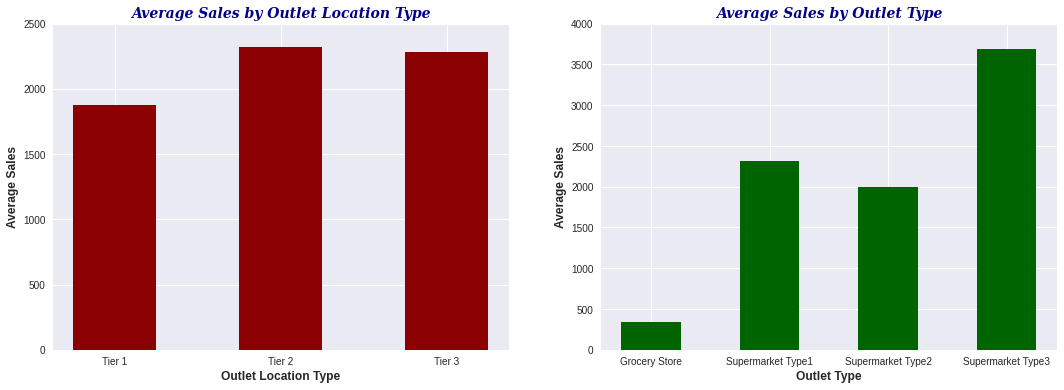

In [40]:
x0 = sales_data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().index
y0 = sales_data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().values

x1 = sales_data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().index
y1 = sales_data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().values

plt.style.use('seaborn')

font = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 14,
        'fontweight': 'bold',
        'color': 'DarkBlue'
        }

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
axs[0].bar(x0, y0, width=0.5, color='darkred')
axs[0].set_title('Average Sales by Outlet Location Type', fontdict=font)
axs[0].set_ylim(0, 2500)
axs[0].tick_params(axis='both', labelsize=10)  #Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tick_params.html
axs[0].set_xlabel('Outlet Location Type', fontsize=12, fontweight='bold')
axs[0].set_ylabel('Average Sales', fontsize=12, fontweight='bold')

axs[1].bar(x1, y1, width=0.5, color='darkgreen')
axs[1].set_title('Average Sales by Outlet Type', fontdict=font)
axs[1].set_ylim(0, 4000)
axs[1].tick_params(axis='both', labelsize=10)
axs[1].set_xlabel('Outlet Type', fontsize=12, fontweight='bold')
axs[1].set_ylabel('Average Sales', fontsize=12, fontweight='bold')

plt.show()

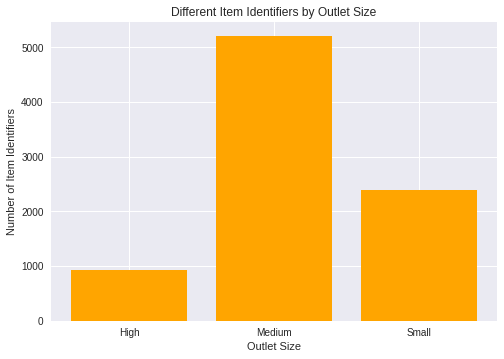

In [61]:
# Number of different item identifiers by the store size
sales_data.groupby('Outlet_Size')['Item_Identifier'].count()

x = sales_data.groupby('Outlet_Size')['Item_Identifier'].count().index
y = sales_data.groupby('Outlet_Size')['Item_Identifier'].count().values

plt.bar(x, y, color='orange')
plt.title('Different Item Identifiers by Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Number of Item Identifiers')
plt.show()


In [ ]:
# Check different types items available in the whole store 
sales_data.value_counts(subset='Item_Identifier')

In [ ]:
#Method 2 - the relative frequency of each unique item
sales_data['Item_Identifier'].value_counts()
sales_data['Item_Identifier'].value_counts(normalize=True)

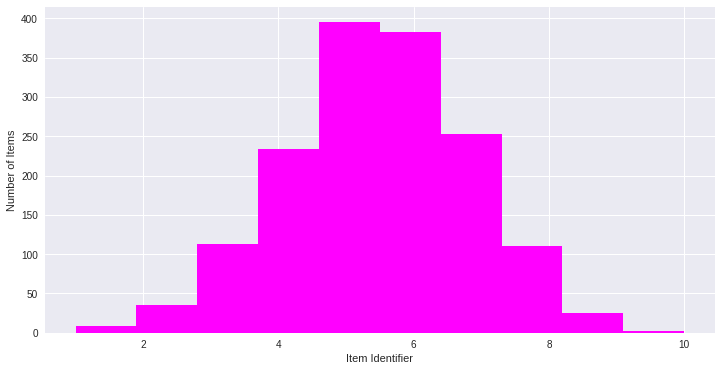

In [66]:
sales_data['Item_Identifier'].value_counts().plot.hist(color='magenta', figsize=(12, 6))
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.show()

In [65]:
# Different varieties of fats in food items by the Outlet Type
sales_data.groupby('Outlet_Size')['Item_Fat_Content'].value_counts()



Outlet_Size  Item_Fat_Content
High         Low Fat              606
             Regular              326
Medium       Low Fat             3361
             Regular             1842
Small        Low Fat             1550
             Regular              838
Name: Item_Fat_Content, dtype: int64

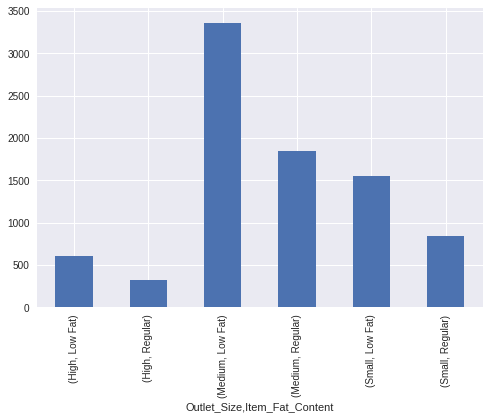

In [68]:
sales_data.groupby('Outlet_Size')['Item_Fat_Content'].value_counts().plot.bar()
plt.show()
